# Midterm Task: Hyperspectral Image Segmentation

## Task Overview

For this question, your task is to perform **image segmentation** on a hyperspectral image. You will be provided with preprocessed hyperspectral data and corresponding ground truth labels. Your goal is to segment the image into meaningful regions based on the spectral characteristics of the pixels. Once you have completed the segmentation, you will evaluate the performance of your results by comparing against the ground truth labels.

## Hyperspectral Data Explanation

The hyperspectral image consists of 307x307 pixels, with each pixel having 162 spectral bands. These spectral bands represent different wavelengths across the electromagnetic spectrum, allowing for detailed analysis of the scene beyond the visible range.

Each pixel corresponds to one of the following classes:
- **#0**: Asphalt Road
- **#1**: Grass
- **#2**: Tree
- **#3**: Roof
- **#4**: Metal
- **#5**: Dirt

The ground truth labels represent the true class for each pixel, and your task is to segment the image based on these categories.

## Steps:

1. **Load the Data**: Use the provided Python code to load the preprocessed data (`X.npy` for the hyperspectral data and `y.npy` for the ground truth labels).
   
2. **Segmentation**: Perform segmentation on the hyperspectral data. You may explore any technique you deem appropriate for this task.

3. **Evaluation**: After performing segmentation, use the provided evaluation script to compare your segmentation results with the ground truth labels using **Adjusted Rand Index (ARI)**.

## **Step 1: Load the Data**

Use the following Python code to load the hyperspectral data and the ground truth labels. 

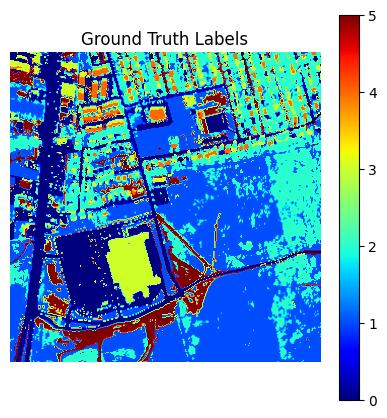

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the hyperspectral data (X) and ground truth labels (y)
y = np.load("y.npy")  # Shape: (307, 307)
X = np.load("X.npy")  # Shape: (307, 307, 162)

# Display the ground truth labels to visualize the classes
plt.figure(figsize=(5, 5))
plt.title('Ground Truth Labels')
plt.imshow(y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

In [6]:
X[0, 0, :]

array([109, 113, 118, 102, 107, 117, 122, 122, 129, 124, 125, 126, 127,
       131, 125, 138, 127, 133, 130, 129, 133, 134, 135, 137, 144, 145,
       141, 144, 133, 146, 155, 156, 161, 164, 169, 174, 175, 171, 176,
       180, 171, 179, 175, 182, 176, 175, 186, 177, 185, 171, 179, 180,
       168, 183, 187, 179, 173, 191, 184, 176, 174, 181, 195, 189, 191,
       193, 176, 174, 177, 161, 159, 202, 190, 187, 185, 188, 185, 188,
       191, 187, 174, 155, 223, 235, 199, 199, 202, 205, 205, 201, 202,
       203, 194, 188, 245, 234, 226, 230, 226, 226, 225, 226, 225, 226,
       226, 223, 225, 232, 231, 227, 230, 230, 232, 233, 231, 233, 234,
       234, 235, 221, 214, 251, 267, 256, 251, 246, 253, 258, 257, 250,
       251, 258, 268, 273, 263, 268, 262, 258, 258, 251, 244, 241, 239,
       249, 252, 263, 274, 266, 258, 259, 258, 244, 246, 240, 249, 243,
       232, 244, 238, 259, 237, 264], dtype=uint16)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=0)
X_reshaped = X.reshape(-1, 162)
x_transformed = pca.fit_transform(X_reshaped)
predicted_labels = np.argmax(x_transformed, axis=1)
segmented_img = predicted_labels.reshape(307, 307)

In [8]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
score1 = adjusted_rand_score(predicted_labels, y.reshape(-1))
score2 = normalized_mutual_info_score(predicted_labels, y.reshape(-1))
print(score1)
print(score2)


0.2500977522917534
0.3885233140634608


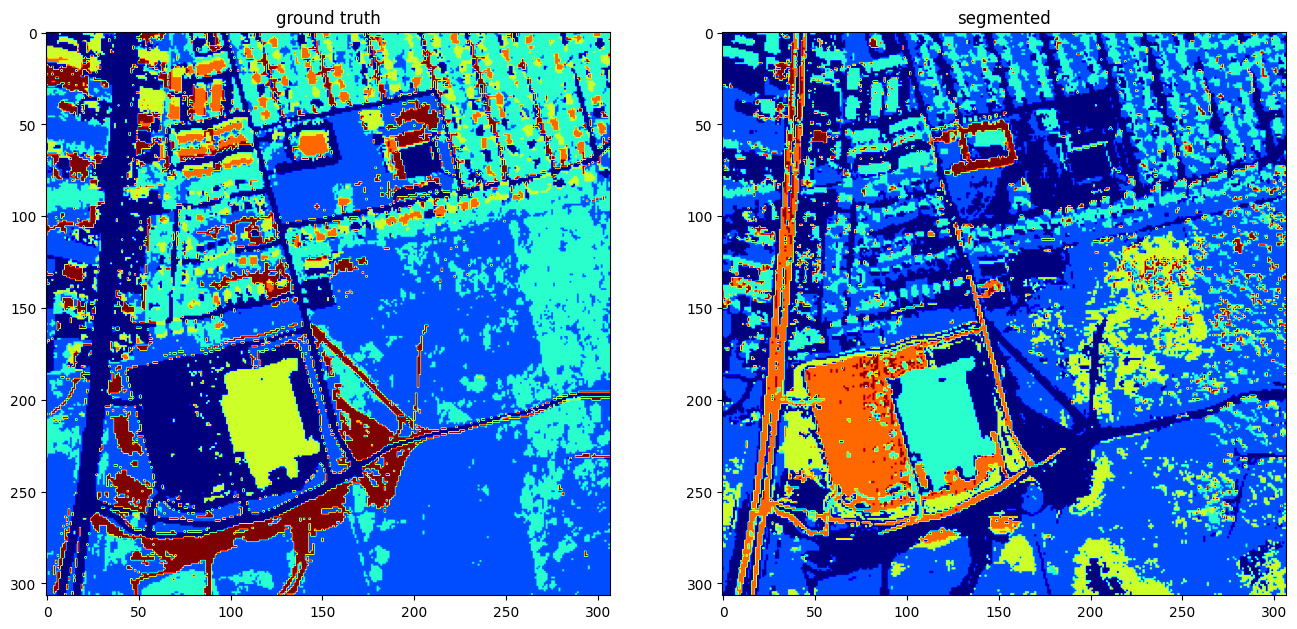

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].set_title('ground truth')
ax[0].imshow(y, cmap='jet')
ax[1].set_title('segmented')
ax[1].imshow(segmented_img, cmap='jet')
plt.show()

## **Step 2: Perform Segmentation**

**Your Task**: Implement a segmentation method on the hyperspectral image `image_reshaped`. You may choose any method that you find appropriate.

The variable `image_reshaped` has the shape `(307, 307, 162)`, where the first two dimensions correspond to the pixel grid and the last dimension represents the 162 spectral bands for each pixel. 

You need to output a 2D array (segment map) of the same shape as the ground truth labels `(307, 307)` where each pixel is assigned a class label.

In [10]:
# Your segmentation code here
# Segment the image_reshaped into labels
# segmented_labels = ...

# Example:
# segmented_labels = some_segmentation_function(image_reshaped)

## **Step 3: Evaluate the Segmentation**

Once you have segmented the image, you need to evaluate the quality of your segmentation by comparing it with the ground truth labels. It's up to you to choose the appropriate metric to compare your segmentation results with the ground truth.

In [11]:
# Import your chosen metric from sklearn or another library
# Example: from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


# Print the chosen evaluation metric
print(f"Your Chosen Metric Score: {score:.4f}")


NameError: name 'score' is not defined

## Deliverables:
- Your ipynb for the segmentation task with the outputs.

Good luck!